## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

## Read data

In [2]:

dataframe=pd.read_csv('/Users/0xnrous/Developer/ML_Colab_graduation_project/ML_DNA _gene_predicting_cancer/datasets/cancer_gene_expression.csv')


In [3]:
dataframe.head(10)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.000000,0.000000,0.000000,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.000000,0.000000,0.000000,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.000000,0.000000,0.000000,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.000000,0.000000,0.000000,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.000000,0.000000,0.000000,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
5,0.0,0.000000,0.0,3.285950,0.000000,0.000000,0.000000,0.0,0.000000,1.858419,...,11.262077,7.935401,6.686234,6.310078,11.629398,6.068034,10.156854,8.395337,2.304277,LUAD
6,0.0,0.927593,0.0,3.324983,0.537147,1.234624,1.234624,0.0,2.779008,3.563817,...,11.450423,8.470175,3.768682,5.909027,11.181531,8.171552,9.788190,5.526883,0.927593,KIRC
7,0.0,0.000000,0.0,3.352052,0.000000,0.000000,0.000000,0.0,0.000000,0.690730,...,12.555854,8.118645,4.530214,6.550340,11.619693,7.841923,10.426789,6.269480,1.789228,LUAD
8,0.0,0.000000,0.0,2.963160,0.000000,0.000000,0.000000,0.0,0.979074,0.979074,...,11.240350,8.633885,8.201139,6.848948,11.871347,8.114476,10.361571,9.141946,1.556993,BRCA
9,0.0,0.000000,0.0,2.292075,0.000000,0.000000,0.000000,0.0,0.000000,2.292075,...,12.930699,6.629291,3.225260,6.107033,11.011171,8.111725,10.473645,6.401202,1.690283,COAD



## Data Description




#### **CancerTypes**

* BRCA-Beast invasive carcinoma -- نوع من انواع سرطان الثدي في الغدد اللبنية

* COAD-Colon adenocarcinoma   -- سرطان القولون 

* KIRC-kidney renal clear cell carcinoma -- سرطان الخلايا الكلويه

* LUAD-lung adenocarcinoma -- سرطان الرئة الغدي

* PRAD-prostrate adenocarcinoma -- سرطان غدي البروستاتا

> The dataset comprises RNA-seq gene expression data, capturing various cancer types. Each row corresponds to a sample from a specific cancer, while each column contains the corresponding gene count values. The final column is dedicated to indicating the associated cancer categories.


## Data Exploration & Cleaning




In [4]:
dataframe.shape

(801, 8001)

> **Here we can see that data have $801$ Row and $8001$ columns**

In [5]:
dataframe.columns.unique()

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6', 'gene_7',
       'gene_8', 'gene_9', 'gene_10',
       ...
       'gene_7992', 'gene_7993', 'gene_7994', 'gene_7995', 'gene_7996',
       'gene_7997', 'gene_7998', 'gene_7999', 'gene_8000', 'Cancer_Type'],
      dtype='object', length=8001)

In [6]:
'''
i make this loop to ensure that column names are unique don't deeep in it 
'''
#for i in dataframe.columns:
    #print(i)

"\ni make this loop to ensure that column names are unique don't deeep in it \n"

In [7]:
#check for missing values
null_data=dataframe.isnull().sum()
null_data

gene_1         0
gene_2         0
gene_3         0
gene_4         0
gene_5         0
              ..
gene_7997      0
gene_7998      0
gene_7999      0
gene_8000      0
Cancer_Type    0
Length: 8001, dtype: int64

In [8]:
#check for missing values
g=[i for i in null_data if i>0]
print('columns with Null values:%d'%len(g))

columns with Null values:0


In [9]:
dataframe['Cancer_Type'].dtype

dtype('O')

In [10]:
dataframe['Cancer_Type'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64

In [11]:
cancer_type_counts = dataframe['Cancer_Type'].value_counts().reset_index()
cancer_type_counts.columns = ['Cancer_Type', 'Count']
fig = px.bar(cancer_type_counts, x='Cancer_Type', y='Count', title='Cancer Type Distribution')
fig.show()

> So no we have all data is clean and ready for Exploration.

>   **also we know that only column who has categorical values are Cancer_Type**


* We can see that there are 5 cancer types. And you can also see the number of samples diagnosed with a cancer type 

* BRCA-Beast invasive carcinoma -- نوع من انواع سرطان الثدي في الغدد اللبنية -- 300 حاله 

* KIRC-kidney renal clear cell carcinoma -- سرطان الخلايا الكلويه --146 حاله

* LUAD-lung adenocarcinoma -- سرطان الرئة الغدي -- 141 حاله 

* PRAD-prostrate adenocarcinoma -- سرطان غدي البروستاتا -- 136 حاله


* COAD-Colon adenocarcinoma   -- سرطان القولون -- 78 حاله

> If we collect all these numbers we get $801$   All number number of Rows


 
## **Data preprocesing** 

In [12]:
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [13]:
X.shape , y.shape

((801, 8000), (801,))


**Encode labels**


In [14]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

In [15]:
labels= label_encoder.classes_
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [16]:
classes= np.unique(y_encoded)
classes

array([0, 1, 2, 3, 4])

In [17]:
y_encoded

array([2, 2, 0, 2, 1, 3, 2, 3, 0, 1, 4, 0, 4, 4, 2, 4, 2, 3, 3, 4, 0, 1,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 4, 0, 0, 1, 0,
       3, 2, 1, 1, 2, 0, 4, 1, 0, 3, 3, 0, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0,
       1, 2, 2, 0, 1, 1, 0, 4, 2, 0, 4, 3, 1, 2, 2, 3, 2, 0, 0, 0, 4, 3,
       0, 3, 4, 2, 0, 0, 0, 2, 4, 2, 0, 4, 3, 3, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 2, 3, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 1, 4, 1, 3, 1, 3, 0, 1, 0, 0, 0,
       2, 1, 1, 3, 3, 4, 3, 0, 3, 2, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       3, 2, 1, 3, 0, 0, 3, 0, 4, 4, 3, 1, 0, 0, 0, 4, 1, 0, 4, 0, 4, 1,
       0, 4, 2, 4, 4, 0, 3, 0, 3, 0, 0, 2, 2, 3, 2, 3, 4, 0, 2, 3, 3, 1,
       3, 0, 4, 3, 0, 1, 3, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 0, 2, 3, 0,
       3, 0, 2, 4, 0, 2, 4, 0, 0, 4, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0, 4, 2,
       2, 4, 0, 3, 0, 0, 0, 4, 3, 0, 0, 2, 3, 2, 3, 4, 3, 1, 0, 0, 3, 2,
       0, 1, 0, 4, 3, 1, 3, 1, 2, 3, 2, 1, 0, 0, 3,

In [18]:
pd.Series(y_encoded).value_counts()
px.bar(pd.Series(y_encoded).value_counts(),x=pd.Series(y_encoded).value_counts().index,y=pd.Series(y_encoded).value_counts().values)

\
**Data Splitting**

In [19]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [20]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


\
**Data Normalization**\
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [21]:
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [22]:
X_train_norm.shape , X_test_norm.shape

((640, 8000), (161, 8000))

## **Feature Selection**
The purpose of feature selection is to select relevant features for classification. 
Feature selection is usually used as a pre-processing step before doing the actual learning. 

### Feature Selection using Mutual Information

In [23]:
MI=mutual_info_classif(X_train_norm,y_train)

In [24]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

> here what acutally code make is select the top 300 features with the highest mutual information scores. 

>It sorts the features based on their mutual information scores in descending order ([::-1]), and then selects the top 300 indices.



In [25]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [26]:
X_train_selected.shape

(640, 300)

In [27]:
X_test_selected.shape

(161, 300)

In [28]:
X_test_selected[10:15]

array([[0.3200434 , 0.78068108, 0.        , ..., 0.56674342, 0.73192499,
        0.12423989],
       [0.17046118, 0.39861368, 0.        , ..., 0.39487091, 0.        ,
        0.73713757],
       [0.2551178 , 0.39385254, 0.14776019, ..., 0.44370724, 0.45226819,
        0.57711001],
       [0.2703834 , 0.44515437, 0.        , ..., 0.26763546, 0.66582843,
        0.36376811],
       [0.28363806, 0.80327525, 0.        , ..., 0.35530953, 0.77386058,
        0.03853377]])

## Classification(The random forest classifier)

>   The random forest classifier: works with multiclass and high dimensional data. Classification will involve training and testing of the model

In [29]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred_RF =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

## Classification(GradientBoostingClassifier)


In [30]:
GB = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
GB.fit(X_train_selected, y_train)
# Make predictions on the test set
y_pred_GB = GB.predict(X_test_selected)
# Calculate prediction probabilities
pred_prob_GB = GB.predict_proba(X_test_selected)

### Model Evaluation

- accuracy
- precision
- recall
- f1 score




> **For GB classifier first we calculate the accuracy, precision, recall, and f1 score**

In [31]:
accuracy = balanced_accuracy_score(y_test, y_pred_GB)
precision = precision_score(y_test, y_pred_GB, average='weighted')
recall = recall_score(y_test, y_pred_GB, average='weighted')
f1score = f1_score(y_test, y_pred_GB, average='weighted')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1score:.4f}')

Accuracy: 0.9792
Precision: 0.9877
Recall: 0.9876
F1 Score: 0.9875


In [32]:
accuracy = balanced_accuracy_score(y_test, y_pred_RF)
precision = precision_score(y_test, y_pred_RF, average='weighted')
recall = recall_score(y_test, y_pred_RF, average='weighted')
f1score = f1_score(y_test, y_pred_RF, average='weighted')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1score:.4f}')

Accuracy: 0.9489
Precision: 0.9641
Recall: 0.9627
F1 Score: 0.9628


In [33]:
#generate confusion matrix
cm=confusion_matrix(y_test, y_pred_GB)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [34]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,0,15,0,1,0
KIRC,0,0,28,0,0
LUAD,1,0,0,23,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

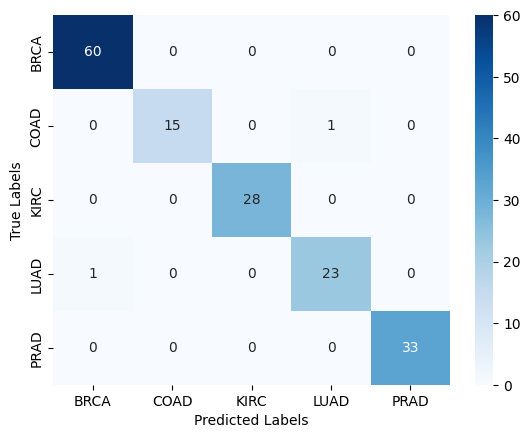

In [35]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [36]:
report=classification_report(y_test,y_pred_GB, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)



classification report


              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.96      0.96      0.96        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.99       161
   macro avg       0.99      0.98      0.98       161
weighted avg       0.99      0.99      0.99       161



### Last parameter (ROC Curve) so that we can see how well our model is performing

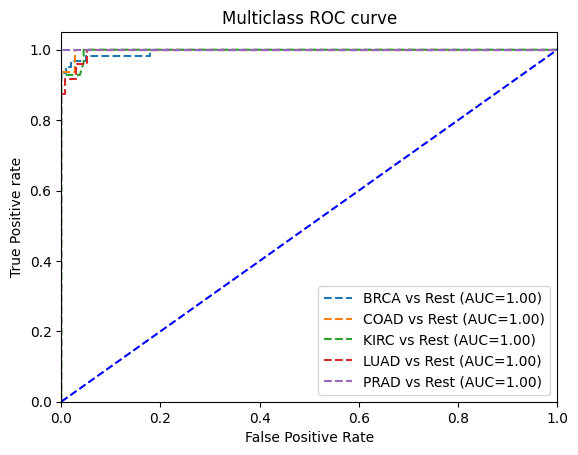

In [37]:
y_test_binarized=label_binarize(y_test,classes=classes)
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
n_class = classes.shape[0]
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    

# Deeplearing model

### Build the Neural Network Model

In [38]:
#model = Sequential()
#model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(nclasses, activation='softmax'))
#opt_adam = keras.optimizers.Adam(learning_rate=0.001)
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])